In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from pathlib import Path
from numpy import nan


In [2]:
root = Path('../results/MJFF/char_time/Enlish_attempt1_talos_best_model_2020-04-01_14-19-07/EnglishData-preprocessed_attempt_1/')

In [3]:
df_all = []
for i in range(10):
    pth = root / 'fold_{}.csv'.format(i)
    df = pd.read_csv(pth)
    df['fold']=i
    df_all.append(df)

df_all=pd.concat(df_all)

In [4]:
df_all.head()

,Participant_ID,Sentence_ID,Diagnosis,Prediction,reduced_typed_sentence,conv1d_1,conv1d_2,conv1d_3,conv1d_4,fold
0,29,55,0,0.429648,"however.ω, religions other than islam, use a d...","[[0.0, 0.0, 0.025980808, 0.08401234, 0.0840123...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.08681614, 0.08681614, 0.08681614, 0.086816...",0
1,29,56,0,0.361022,"he is buried in egypt, aswan at the mausoleum ...","[[0.0, 0.0, 0.024862071, 0.08383991, 0.0838399...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.4550617, 0.4550617, 0.4550617, 0.4550617, ...","[[0.0023849865, 0.0023849865, 0.0023849865, 0....",0
2,29,57,0,0.381353,"boks include penquin island, a satire on the d...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.63439184, 0.63439184, 0.63439184, 0.634391...",0
3,29,58,0,0.207248,the w-shapjωed gωglyph above the second conson...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.04028165, 0.04028165, 0.04028165, 0.040281...",0
4,29,59,0,0.407643,tωthe franks aliance was important exactly bec...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.57451445, 0.57451445, 0.57451445, 0.574514...",0


In [9]:
pd_df = df_all[df_all.Diagnosis == 1]

C:\Users\Mathias\Anaconda3\envs\pd\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


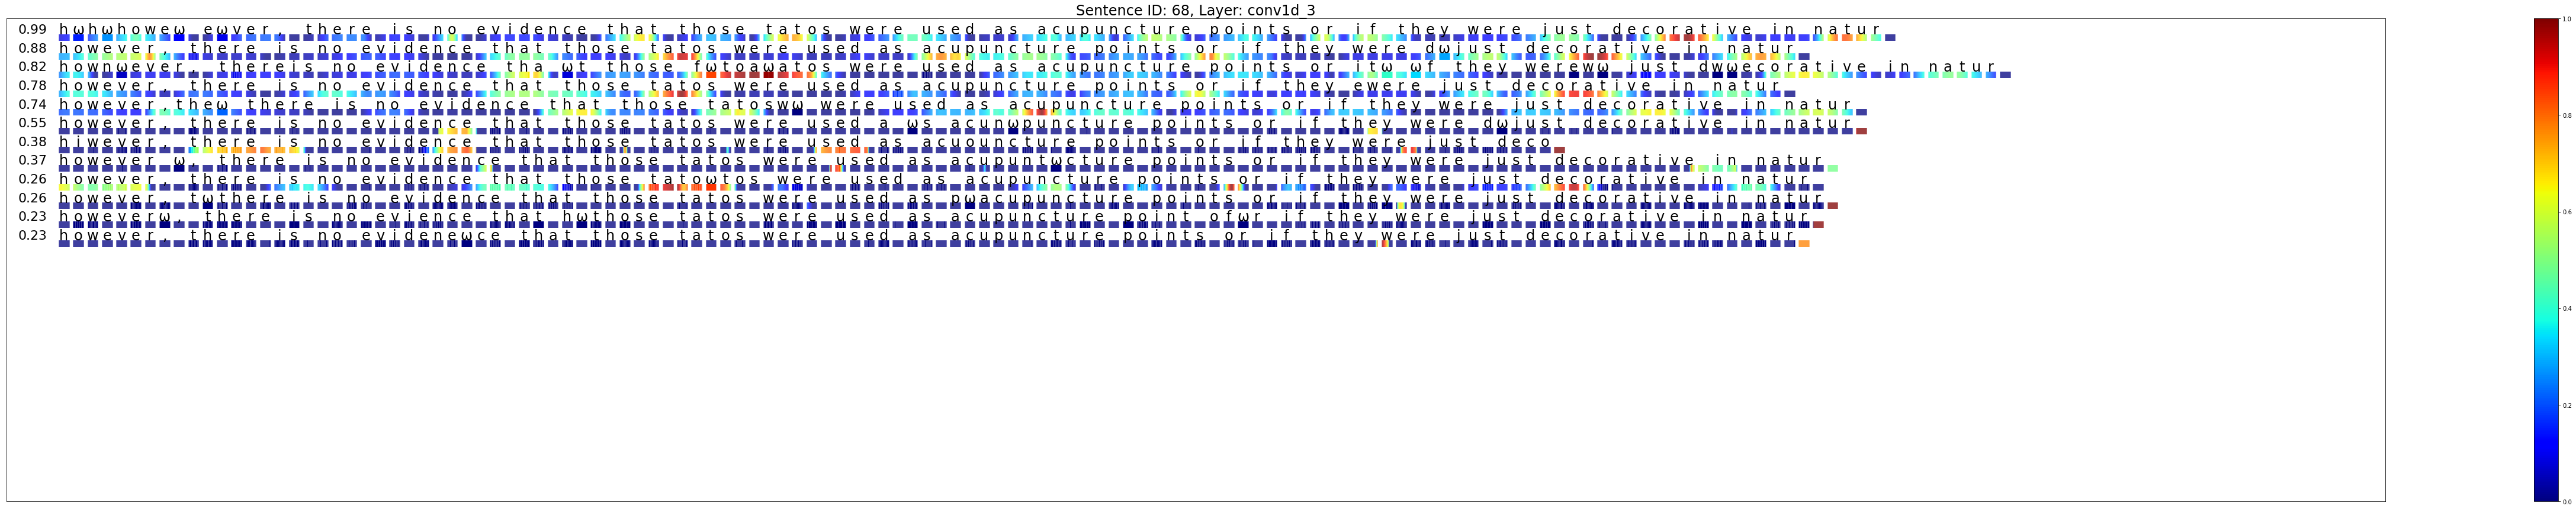

In [31]:
sub_df = pd_df[pd_df.Sentence_ID == 68]

vis_sentence(sub_df, layer='conv1d_3',show = True)



In [33]:
for i, sub_df in pd_df.groupby('Sentence_ID'):
    for layer in ['conv1d_1','conv1d_2','conv1d_3','conv1d_4']:
        vis_sentence(sub_df, layer=layer,show = False)

C:\Users\Mathias\Anaconda3\envs\pd\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
def vis_sentence(df,layer, show = True):
    sent_id_ = df.Sentence_ID.unique()
    assert len(sent_id_) == 1
    df.sort_values(by='Prediction', ascending = False, inplace = True)
    
    
    label = 'Sentence ID: {}, Layer: {}'.format(sent_id_[0],layer)
    save_as = 'PD_ONLY_Sentence_{}_Layer_{}.png'.format(sent_id_[0],layer)

    segments=[]
    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(90,15))

    x_start = 0
    x_end = 0
    x_void = 0.15
    x_width = 0.4
    y_dist2line = 0.2
    y_linedist = 0.5
    y_line = 0
    heat_array=[]
    
    #for fold_id, sub_grp in df.groupby(by = 'fold'):
    X_REDUCED = df.reduced_typed_sentence.values
    HEAT_SEGMENTS = df[layer].apply(lambda x: eval(x)).values
    PREDICTION = df.Prediction.values.round(2)
    for x_reduced,heat_segments, prediction in zip(X_REDUCED, HEAT_SEGMENTS, PREDICTION):
        
        for i, char in enumerate(x_reduced):

            #idx = np.argmax(row) #get char
            #char = idx2char[idx]

            x_end=x_start + x_width
            x_center = (x_start + x_end)*0.5
            
            if i==0:
                ax.text(x_start - 1 ,y_line  + y_dist2line,prediction,fontsize = 22,horizontalalignment='center',verticalalignment='center')

            x = np.linspace(x_start,x_end, len(heat_segments[i])+ 1)
            y = np.ones_like(x)*y_line
            heat_array.extend(heat_segments[i])


            # Create a set of line segments so that we can color them individually
            # This creates the points as a N x 1 x 2 array so that we can stack points
            # together easily to get the segments. The segments array for line collection
            # needs to be (numlines) x (points per line) x 2 (for x and y)
            #ax.text(x_center,y_line  - y_dist2line,str(len(heat_segments[i])),fontsize = 10,horizontalalignment='center',verticalalignment='center')
            if x_center < 90:
                ax.text(x_center,y_line  + y_dist2line,char,fontsize = 24,horizontalalignment='center',verticalalignment='center')
            points = np.array([x, y]).T.reshape(-1, 1, 2)
            segment = np.concatenate([points[:-1], points[1:]], axis=1)
            segments.append(segment)
            x_start = x_end + x_void

        y_line -= y_linedist
        x_start = 0
            
        #y_line -= y_linedist*0.5

    segments = np.concatenate(segments,axis=0)




    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(0, 1)
    cmap = mpl.cm.get_cmap('jet')
    #norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)

    lc = LineCollection(segments, cmap='jet',norm=norm)
    # Set the values used for colormapping
    lc.set_array(np.asarray(heat_array))
    lc.set_linewidth(11)
    line = ax.add_collection(lc)
    fig.colorbar(line, ax=ax)


    ax.set_xlim(-2, 89)
    ax.set_ylim(-12.4,0.5)
    ax.set_title(label,fontsize=24)
    ax.set_xticks([]) 
    ax.set_yticks([])

    plt.savefig(save_as)
    if show:
        plt.show()
        
    plt.cla()
    plt.clf()
    plt.close()

In [91]:
def vis_sentence(df,layer, show = True):
    sent_id_ = df.Sentence_ID.unique()
    assert len(sent_id_) == 1
    
    label = 'Sentence ID: {}, Layer: {}'.format(sent_id_[0],layer)
    save_as = 'Sentence_{}_Layer_{}.png'.format(sent_id_[0],layer)

    segments=[]
    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(90,30))

    x_start = 0
    x_end = 0
    x_void = 0.15
    x_width = 0.4
    y_dist2line = 0.2
    y_linedist = 0.5
    y_line = 0
    heat_array=[]
    
    for fold_id, sub_grp in df.groupby(by = 'fold'):
        X_REDUCED = sub_grp.reduced_typed_sentence.values
        HEAT_SEGMENTS = sub_grp[layer].apply(lambda x: eval(x)).values

        for x_reduced,heat_segments in zip(X_REDUCED,HEAT_SEGMENTS):
            for i, char in enumerate(x_reduced):

                #idx = np.argmax(row) #get char
                #char = idx2char[idx]

                x_end=x_start + x_width
                x_center = (x_start + x_end)*0.5

                x = np.linspace(x_start,x_end, len(heat_segments[i])+ 1)
                y = np.ones_like(x)*y_line
                heat_array.extend(heat_segments[i])


                # Create a set of line segments so that we can color them individually
                # This creates the points as a N x 1 x 2 array so that we can stack points
                # together easily to get the segments. The segments array for line collection
                # needs to be (numlines) x (points per line) x 2 (for x and y)
                #ax.text(x_center,y_line  - y_dist2line,str(len(heat_segments[i])),fontsize = 10,horizontalalignment='center',verticalalignment='center')
                if x_center < 90:
                    ax.text(x_center,y_line  + y_dist2line,char,fontsize = 22,horizontalalignment='center',verticalalignment='center')
                points = np.array([x, y]).T.reshape(-1, 1, 2)
                segment = np.concatenate([points[:-1], points[1:]], axis=1)
                segments.append(segment)
                x_start = x_end + x_void

            y_line -= y_linedist
            x_start = 0
            
        y_line -= y_linedist*0.5

    segments = np.concatenate(segments,axis=0)




    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(0, 1)
    cmap = mpl.cm.get_cmap('jet')
    #norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)

    lc = LineCollection(segments, cmap='jet',norm=norm)
    # Set the values used for colormapping
    lc.set_array(np.asarray(heat_array))
    lc.set_linewidth(11)
    line = ax.add_collection(lc)
    fig.colorbar(line, ax=ax)


    ax.set_xlim(-1, 90)
    ax.set_ylim(-22.4,0.5)
    ax.set_title(label,fontsize=24)
    ax.set_xticks([]) 
    ax.set_yticks([])

    plt.savefig(save_as)
    if show:
        plt.show()
        
    plt.cla()
    plt.clf()
    plt.close()

In [ ]:
def vis_sentence(X_REDUCED,HEAT_SEGMENTS,label,save_as = 'test.png', show = True):
    segments=[]
    fig, ax = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(60,30))

    x_start = 0
    x_end = 0
    x_void = 0.2
    x_width = 0.4
    y_dist2line = 0.2
    y_linedist = 0.5
    y_line = 0
    heat_array=[]
    
    for x_reduced,heat_segments in zip(X_REDUCED,HEAT_SEGMENTS):
        for i, char in enumerate(x_reduced):

            #idx = np.argmax(row) #get char
            #char = idx2char[idx]

            x_end=x_start + x_width
            x_center = (x_start + x_end)*0.5

            x = np.linspace(x_start,x_end, len(heat_segments[i])+ 1)
            y = np.ones_like(x)*y_line
            heat_array.extend(heat_segments[i])


            # Create a set of line segments so that we can color them individually
            # This creates the points as a N x 1 x 2 array so that we can stack points
            # together easily to get the segments. The segments array for line collection
            # needs to be (numlines) x (points per line) x 2 (for x and y)
            #ax.text(x_center,y_line  - y_dist2line,str(len(heat_segments[i])),fontsize = 10,horizontalalignment='center',verticalalignment='center')
            if x_center < 90:
                ax.text(x_center,y_line  + y_dist2line,char,fontsize = 22,horizontalalignment='center',verticalalignment='center')
            points = np.array([x, y]).T.reshape(-1, 1, 2)
            segment = np.concatenate([points[:-1], points[1:]], axis=1)
            segments.append(segment)
            x_start = x_end + x_void
        
        y_line -= y_linedist
        x_start = 0

    segments = np.concatenate(segments,axis=0)




    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(0, 1)
    cmap = mpl.cm.get_cmap('jet')
    #norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)

    lc = LineCollection(segments, cmap='jet',norm=norm)
    # Set the values used for colormapping
    lc.set_array(np.asarray(heat_array))
    lc.set_linewidth(10)
    line = ax.add_collection(lc)
    fig.colorbar(line, ax=ax)


    ax.set_xlim(-1, 75)
    ax.set_ylim(-20.1,0.5)
    ax.set_title(label,fontsize=18)
    ax.set_xticks([]) 
    ax.set_yticks([])

    plt.savefig(save_as)
    if show:
        plt.show()
        
    plt.cla()
    plt.clf()
    plt.close()